## Runge Kutta Exercises

In this notebook I will be exploring first, second, and fourth order Runge Kutta algorithms for solving differential equations. I will be basing the code and examples on [this](https://lpsa.swarthmore.edu/NumInt/NumIntIntro.html). It is mostly for my learning benefit.

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd

Start with the equation: 

\begin{align*}
\dot{y}(t)=-2y(t)
\end{align*}

This has a solution $y(t) = 3e^{-2t}, t \geq 0$.

Here, the approximation for the derivative $\dot{y}(t) = -2y(t)$ would be $k_1 = -2y^*(h)$, where $y^*$ is the approximation for $y$ and $h$ is the time step between the previous value of $y^*$ and the next one.

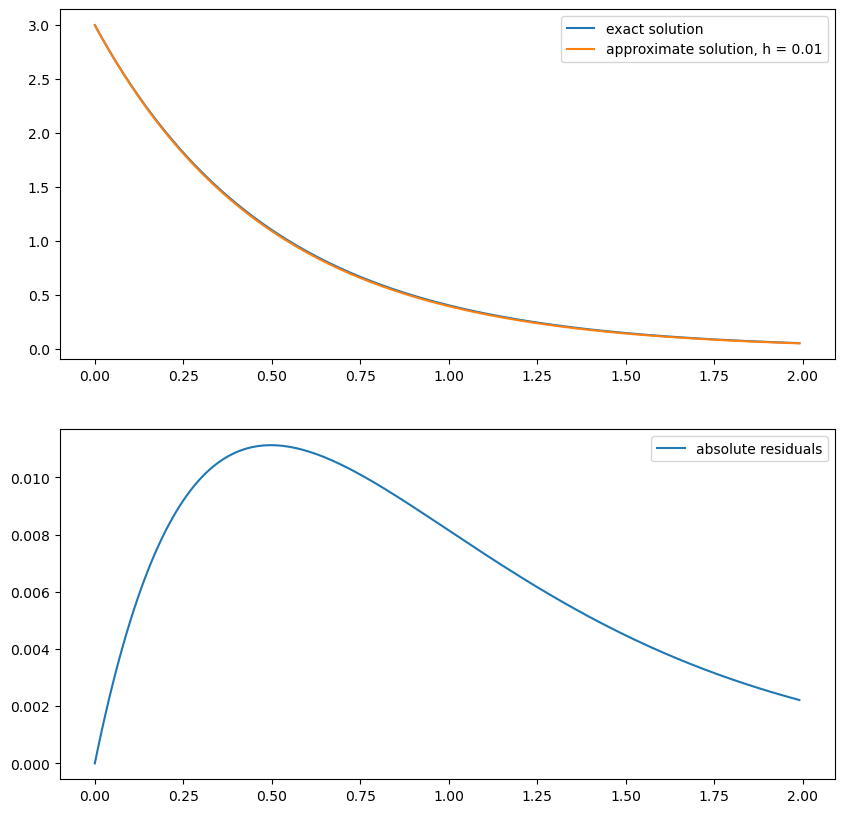

Average Error:  0.0068414054414902715


In [30]:
# solve y' = -2y
y0 = 3 #initial condition
h = 0.01 #time step
t = np.arange(start=0, stop=2, step=h) #t from 0 to 2 sec
yexact = 3*np.exp(-2*t) #exact solution for the equation
ystar = np.zeros(len(t)) #empty array for manipulating

ystar[0] = y0 #initial condition for the array, will set subsequent steps

for i in range(len(t)-1):
    k1 = -2*ystar[i]
    ystar[i+1] = ystar[i] + k1*h

residuals = ystar - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, ystar, label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
print("Average Error: ", meanDeviation)

Note above that the average error is of order h, as predicted by the theory.

Now I will consider the same equation with an input: 

\begin{align*}
\dot{y}(t) = \cos(4t) - 2y(t)
\end{align*}

This has an exact solution: $y(t) = 2.9e^{-2t} + 0.1\cos(4t) + 0.2\sin(4t)$.

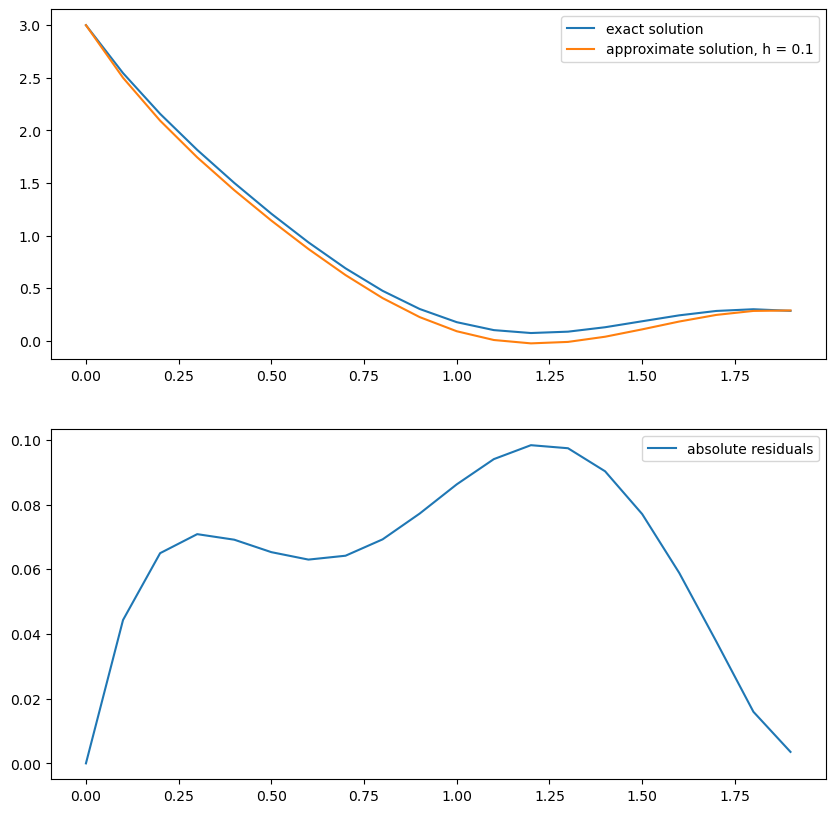

Average Error:  0.0623714175507288


In [32]:
# solve y' = -2y
y0 = 3 #initial condition
h = 0.1 #time step
t = np.arange(start=0, stop=2, step=h) #t from 0 to 2 sec

#exact solution for the equation:
yexact = 2.9*np.exp(-2*t) + 0.1*np.cos(4*t)  + 0.2*np.sin(4*t)

ystar = np.zeros(len(t)) #preallocated empty array for manipulating

ystar[0] = y0 #initial condition for the array, will set subsequent steps

for i in range(len(t)-1):
    k1 = -2*ystar[i] + np.cos(4*t[i]) #derivative approximation
    ystar[i+1] = ystar[i] + k1*h #subsequent step based on approx

residuals = ystar - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, ystar, label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
print("Average Error: ", meanDeviation)

A third example: 

\begin{align*}
\dot{y}(t)-y(t)(1-2t) = 0, y(0) = 1
\end{align*}

This has solution $y(t) = e^{t-t^2}$. For the algorithm, 

\begin{align*}
\dot{y}(t_0) &= y(t_0)(1-2t_0) \\
k_1 &= y^*(t_0)(1-2t_0)\\
y^*(t_0+h) &= y^*(t_0)+k_1h
\end{align*}

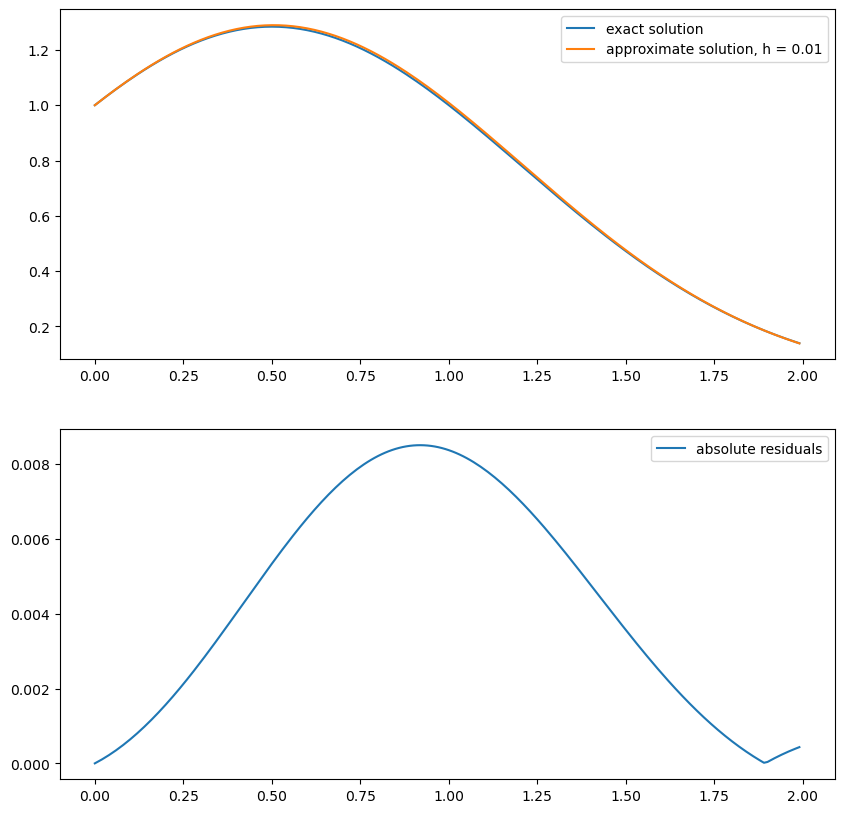

Average Error:  0.004368300246037844


In [34]:
# solve y' = -2y
y0 = 1 #initial condition
h = 0.01 #time step
t = np.arange(start=0, stop=2, step=h) #t from 0 to 2 sec

#exact solution for the equation:
yexact = np.exp(t-t**2)

ystar = np.zeros(len(t)) #preallocated empty array for manipulating

ystar[0] = y0 #initial condition for the array, will set subsequent steps

for i in range(len(t)-1):
    k1 = ystar[i]*(1-2*t[i])#derivative approximation
    ystar[i+1] = ystar[i] + k1*h #subsequent step based on approx

residuals = ystar - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, ystar, label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
print("Average Error: ", meanDeviation)

## Higher order equations

For higher order ODE, we'll work with the problem as a matrix differential equation. Consider the example:

\begin{align*}
\dddot{y}(t) + 4\ddot{y}(t) + 6\dot{y}(t) &= \gamma(t), \gamma(t) \text{ is the unit step function} \\
\ddot{y}(0^+) &= 0, \\
\dot{y}(0^+) &= -1 \\
y(0^+) &= 0
\end{align*}

We can let the state vector

\begin{align*}
\mathbf{q}(t) = 

\begin{bmatrix}
q_1(t) \\
q_2(t) \\
q_3(t) 
\end{bmatrix} 
= 
\begin{bmatrix}
y(t) \\
\dot{y}(t) \\
\ddot{y}(t) 
\end{bmatrix} 
\end{align*}
